Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package. 


**Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.optimizers import AdamW
import keras

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [2]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


170498071/170498071 [==============================] - 3s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:

N_EPOCH = 40 # 40 bigger network will benefit from extra training epochs

inputs=keras.Input((IMG_ROWS, IMG_COLS, IMG_CHANNELS))

def builder(hp):
  f1 = hp.Int('f1', min_value = 16, max_value = 512, step=16)
  ks1 = hp.Int('ks1', min_value=3, max_value=5, step=2)
  ks2 = hp.Int('ks2', min_value=3, max_value=5, step=2)
  ps1 = hp.Int('ps1', min_value=2, max_value=3, step=1)
  c1 = Conv2D(64, kernel_size=ks1, padding='same', activation='relu')(inputs)
  c2 = Conv2D(54, kernel_size=ks2, padding='same', activation='relu')(c1)
  n1 = keras.layers.BatchNormalization()(c2)
  p1 = MaxPooling2D(pool_size=(ps1, ps1))(n1)
  d1 = Dropout(rate=.1)(p1)

  a = keras.layers.Attention()([p2,p2])
  f2 = hp.Int('f2', min_value=16, max_value=512, step=16)
  ks3= hp.Int('ks3', min_value=3, max_value=5, step=2)
  ks4 = hp.Int('ks4', min_value=3, max_value=5, step=2)
  ps2 = hp.Int('ps2', min_value=2, max_value=3, step=1)
  c3 = Conv2D(f2, kernel_size=ks3, padding='same', activation='relu')(d1)
  c4 = Conv2D(f2, kernel_size=ks4, padding='same', activation='relu')(c3)
  n2 = keras.layers.BatchNormalization()(c4)
  p2 = MaxPooling2D(pool_size=(ps2, ps2))(n2)
  d2 = Dropout(rate = 0.25)(p2)

  f = Flatten()(d2)
  hp_units = hp.Int('hpu', min_value=32, max_value=1024, step=32)
  d3 = Dense(units=hp_units, activation='relu')(f)
  d4 = Dropout(rate = .5)(d3)
  d5 = Dense(N_CLASSES,activation="softmax")(d4)
  model = keras.Model(inputs = inputs, outputs = d5)
  model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
  return model

tuner = kt.Hyperband(builder, objective='val_accuracy', max_epochs = 30, factor=3)

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.summary()
tuner.search(input_X_train, output_Y_train, validation_split=.2, callbacks=[stop_early])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_23 (Conv2D)             (None, 32, 32, 32)   896         ['input_9[0][0]']                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 32, 32, 32)   9248        ['conv2d_23[0][0]']              
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 16, 16, 32)  0           ['conv2d_24[0][0]']              
                                                                                            

In [ ]:
if run:
  tuner.search(input_X_train, output_Y_train, validation_split=.2, callbacks=[stop_early])

Trial 90 Complete [00h 02m 58s]
val_accuracy: 0.6844000220298767

Best val_accuracy So Far: 0.7350000143051147
Total elapsed time: 01h 13m 03s


In [ ]:
if run:
  best = tuner.get_best_models()[0]
  print(best)
  best.build(input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS))
  best.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=20,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.,
   horizontal_flip=True,
   fill_mode='nearest')

Augmenting training set images...


In [6]:
from sklearn.model_selection import train_test_split

input_X_train, output_x_val, output_Y_train, output_y_val = train_test_split(input_X_train, output_Y_train, train_size = .8)
#fit the dataset
datagen.fit(input_X_train)



In [12]:
from torch.optim import adamw
BATCH_SIZE = 64
N_EPOCH = 40 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = AdamW()

inputs=keras.Input((IMG_ROWS, IMG_COLS, IMG_CHANNELS))

c1 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(inputs)
c2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(c1)
n1 = keras.layers.BatchNormalization()(c2)
p1 = MaxPooling2D(pool_size=(2, 2))(n1)
d1 = Dropout(rate=.25)(p1)

a = keras.layers.Attention()([p1,p1])


c3 = Conv2D(256, kernel_size=5, padding='same', activation='relu')(a)
c4 = Conv2D(256, kernel_size=5, padding='same', activation='relu')(c3)
n2 = keras.layers.BatchNormalization()(c4)
p2 = MaxPooling2D(pool_size=(3, 3))(n2)
d2 = Dropout(rate = 0.25)(p2)

f = Flatten()(d2)
d3 = Dense(units=512, activation='relu')(f)
d4 = Dropout(rate = .5)(d3)
d5 = Dense(N_CLASSES,activation="softmax")(d4)
model = keras.Model(inputs = inputs, outputs = d5)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d_4[0][0]']               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_5[0][0]']               
 rmalization)                                                                               

In [13]:
cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.2, patience=5, min_lr=.0000001)
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=256),steps_per_epoch=input_X_train.shape[0]//256, epochs=45, verbose=VERBOSE, validation_data = (output_x_val, output_y_val),callbacks = [cb])
#history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=50, verbose=VERBOSE, validation_split=.2,callbacks = [cb])

#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture3.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights3.h5', overwrite=True)

print('Files saved for model definition and for weights.')
#history = model.fit(input_X_train, output_Y_train, batch_size=128, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE, callbacks = [cb])

Epoch 1/45
156/156 [==============================] - 35s 197ms/step - loss: 2.3360 - accuracy: 0.2479 - recall_1: 0.0504 - precision_1: 0.3222 - val_loss: 6.9002 - val_accuracy: 0.1029 - val_recall_1: 0.1024 - val_precision_1: 0.1031 - lr: 0.0010
Epoch 2/45
156/156 [==============================] - 28s 182ms/step - loss: 1.7462 - accuracy: 0.3574 - recall_1: 0.1142 - precision_1: 0.5816 - val_loss: 4.8830 - val_accuracy: 0.2020 - val_recall_1: 0.1712 - val_precision_1: 0.2049 - lr: 0.0010
Epoch 3/45
156/156 [==============================] - 29s 186ms/step - loss: 1.5940 - accuracy: 0.4213 - recall_1: 0.1893 - precision_1: 0.6298 - val_loss: 1.6637 - val_accuracy: 0.4437 - val_recall_1: 0.2527 - val_precision_1: 0.5756 - lr: 0.0010
Epoch 4/45
156/156 [==============================] - 30s 191ms/step - loss: 1.4684 - accuracy: 0.4693 - recall_1: 0.2580 - precision_1: 0.6692 - val_loss: 1.2725 - val_accuracy: 0.5512 - val_recall_1: 0.3451 - val_precision_1: 0.7627 - lr: 0.0010
Epoch 5/

157/157 [==============================] - 2s 10ms/step - loss: 0.4669 - accuracy: 0.8539 - recall_1: 0.8227 - precision_1: 0.8897

Test score/loss: 0.46694669127464294
Test accuracy: 0.8539000153541565
Tset recall: 0.822700023651123
Test precision: 0.8896939754486084
Test F1: 0.8548864981174257
dict_keys(['loss', 'accuracy', 'recall_1', 'precision_1', 'val_loss', 'val_accuracy', 'val_recall_1', 'val_precision_1', 'lr'])


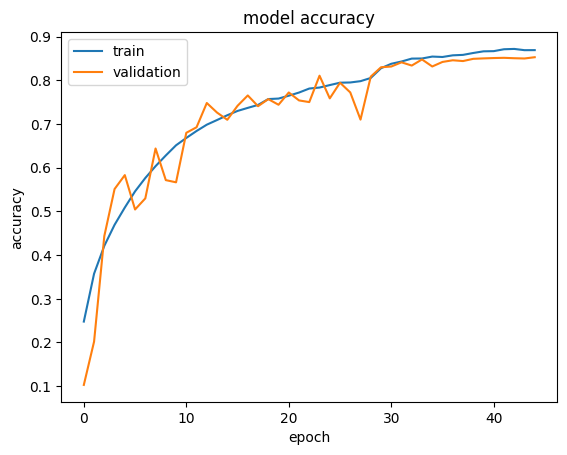

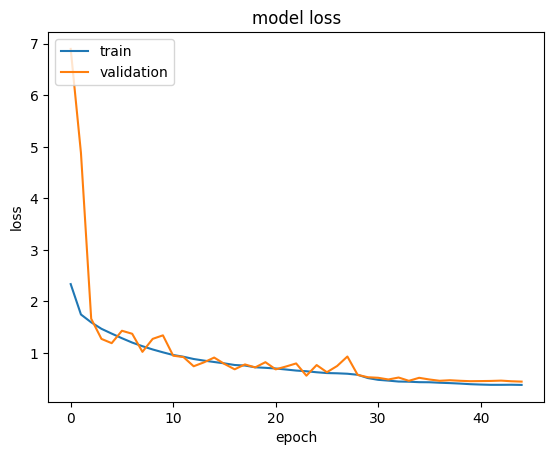

In [15]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])
print("Tset recall:",score[2])
print("Test precision:",score[3])
f1 = (2*score[2]*score[3])/(score[2]+score[3])
print("Test F1:",f1)
# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [ ]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/40


<ipython-input-16-27f0d892da1d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


390/390 [==============================] - 28s 71ms/step - loss: 1.4859 - accuracy: 0.4834
Epoch 2/40
390/390 [==============================] - 28s 73ms/step - loss: 1.4341 - accuracy: 0.5018
Epoch 3/40
390/390 [==============================] - 28s 71ms/step - loss: 1.4153 - accuracy: 0.5088
Epoch 4/40
390/390 [==============================] - 28s 71ms/step - loss: 1.3887 - accuracy: 0.5163
Epoch 5/40
390/390 [==============================] - 29s 73ms/step - loss: 1.3890 - accuracy: 0.5161
Epoch 6/40
390/390 [==============================] - 28s 71ms/step - loss: 1.3732 - accuracy: 0.5229
Epoch 7/40
390/390 [==============================] - 28s 71ms/step - loss: 1.3764 - accuracy: 0.5212
Epoch 8/40
390/390 [==============================] - 28s 71ms/step - loss: 1.3575 - accuracy: 0.5280
Epoch 9/40
390/390 [==============================] - 28s 71ms/step - loss: 1.3544 - accuracy: 0.5276
Epoch 10/40
390/390 [==============================] - 27s 70ms/step - loss: 1.3583 - accurac

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

79/79 [==============================] - 0s 6ms/step - loss: 1.3647 - accuracy: 0.4979

Test score/loss: 1.3647339344024658
Test accuracy: 0.49790000915527344
dict_keys(['loss', 'accuracy'])


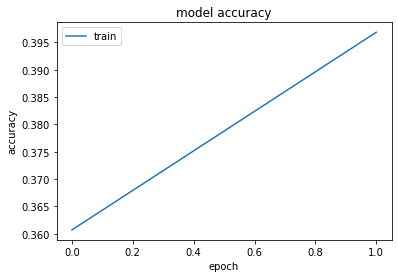

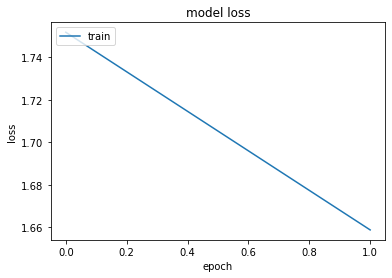

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.